# Importing the libraries

In [1]:
#We start off with importing the modules and libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import Data_project as dp #importing the python file
from pandas_datareader import wb # import WB API
import ipywidgets as widgets #to make it interactive

# Electricity Production from Renewable Energy (as % of total)

## Importing and Data Cleaning

In [2]:
wb_rnwx = wb.download(indicator='EG.ELC.RNWX.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_rnwx = wb_rnwx.rename(columns = {'EG.ELC.RNWX.ZS':'elec_prod_from_renewable_energy'})

wb_rnwx = dp.data_cleaning1(wb_rnwx) #calling the function from the python file

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Summary statistics

In [3]:
wb_rnwx.describe()

,year,elec_prod_from_renewable_energy
count,164.000000,164.000000
mean,1995.000000,2.191722
std,11.868399,2.943473
min,1975.000000,0.118038
25%,1985.000000,0.464843
50%,1995.000000,1.380155
75%,2005.000000,2.505018
max,2015.000000,18.041960


## The Figure for Renewable Energy

In [4]:
widgets.interact(dp.plot_wb1, 
    wb_rnwx = widgets.fixed(wb_rnwx),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_rnwx.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In figure 2.1 we see an increase in electricity production from renewable energy for the European Union and North America by respectively 17,5 %-points and 7%-point, showing that the European Union is leading the race in electricity production from renewable sources. Sub-Saharan Africa has only recently, from ca. 2012 started seing an increase in electricity production from renewable energy, with a rise of about 1,5%-point of total production. Most suprisingly, Latin America and the Caribbean has had the same rise in %-points over the period as North America, only difference being that their switch to renewable energy started later, in 2000.

# Electricity Production from Nuclear Energy (as % of total)

## Importing and Data Cleaning

In [5]:
#this time the code is for electricity production from nuclear energy
wb_nucl = wb.download(indicator='EG.ELC.NUCL.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_nucl = wb_nucl.rename(columns = {'EG.ELC.NUCL.ZS':'elec_prod_from_nuclear_energy'})

wb_nucl = dp.data_cleaning2(wb_nucl)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Summary statistics

In [6]:
wb_nucl.describe()

,year,elec_prod_from_nuclear_energy
count,164.000000,163.000000
mean,1995.000000,11.958706
std,11.868399,11.363315
min,1975.000000,0.000000
25%,1985.000000,2.407216
50%,1995.000000,5.654875
75%,2005.000000,19.017553
max,2015.000000,33.812418


## The Figure for Nuclear Energy

In [7]:
widgets.interact(dp.plot_wb2, 
    wb_nucl = widgets.fixed(wb_nucl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_nucl.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

# Electricity Production from Fossil Fuels (as % of total)

## Importing and Data Cleaning

In [8]:
# load wb data for energy production from fossil fuels 1975-2015
wb_fosl = wb.download(indicator='EG.ELC.FOSL.ZS', country=['EUU','NAC','SSA','TLA'], start=1975, end=2015)
wb_fosl = wb_fosl.rename(columns = {'EG.ELC.FOSL.ZS':'fosl'})

wb_fosl = dp.data_cleaning3(wb_fosl)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Summary Statistics

In [9]:
wb_fosl.describe()

,year,fosl
count,164.000000,164.000000
mean,1995.000000,55.691065
std,11.868399,13.805352
min,1975.000000,28.929759
25%,1985.000000,42.746090
50%,1995.000000,62.811625
75%,2005.000000,67.294690
max,2015.000000,74.799558


## Figure for Fossil Fuels

In [10]:
widgets.interact(dp.plot_wb3, 
    wb_fosl = widgets.fixed(wb_fosl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_fosl.country.unique(), 
                                    value='European Union')
);

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

# Figure of fossil fuels compared to renewable energy

In [11]:
def plot_wb7(wb_rnwx, country): 
    print(list(wb_rnwx.country.unique()))
    y_limits = {'European Union': (0, 30), 
                'Latin America & the Caribbean (IDA & IBRD countries)': (0, 15),
                'North America': (0, 15),
                'Sub-Saharan Africa (excluding high income)': (0, 5)}
    
    fig,ax=plt.subplots(figsize=(8,6))
    
    wb_eu = wb_rnwx[wb_rnwx['country'] == country]
    wb_fosl_eu = wb_fosl[wb_fosl['country'] ==  country]

    l = ax.plot(wb_eu.year, wb_eu.elec_prod_from_renewable_energy, color='green', label = 'renewable srcs')
    ax.set_xlabel("year",fontsize=14)
    ax2=ax.twinx()
    l2 = ax2.plot(wb_fosl_eu.year, wb_fosl_eu.fosl, color='red', label = 'fossil fuels')
    ax.set_ylabel('% share renewable sources')
    ax.set_xlabel('year',fontsize=14)
    ax.set_xlim(1975, 2015)
    ax.set_ylim(y_limits[country])
    ax.set_title('% Energy prod from renewable (green) vs fossil (red) sources')
    
    ax2.grid(None)
    lns = l + l2
    labels = [l.get_label() for l in lns]

    plt.legend(lns, labels, loc = 'upper center', facecolor = 'yellow')

widgets.interact(plot_wb7, 
    wb_rnwx = widgets.fixed(wb_rnwx),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_rnwx.country.unique(), 
                                    value='European Union')
                 
);

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

ADD text here

# Merging of the Datasets to Calculate the %-point Difference in Production

In [12]:
#We merge, first for nuclear- and renewable energy
wb = pd.merge(wb_nucl, wb_rnwx, on=['country', 'year'], how='left')
wb.rename(columns={'elec_prod_from_nuclear_energy':'e'}, inplace=True)
wb.rename(columns={'elec_prod_from_renewable_energy':'r'}, inplace=True)

In [13]:
#Then we merge for renewable energy and fossil fuels
wb2 = pd.merge(wb_fosl, wb_rnwx, on=['country', 'year'], how='left')
wb2.dropna()
wb2.rename(columns={'fosl':'f'}, inplace=True)
wb2.rename(columns={'elec_prod_from_renewable_energy':'re'}, inplace=True)

## The Calculation

In [14]:
wb['prod_diff'] = wb.e - wb.r #we calculate the difference between the above datasets in percentage-points
wb2['prod_diff2'] = wb2.f - wb2.re

## The Interactive Figure Showing the %-point Difference

In [15]:
widgets.interact(dp.plot_wb4, 
    wb = widgets.fixed(wb),
    country = widgets.Dropdown(description='Country', 
                                    options=wb.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In [16]:
widgets.interact(dp.plot_wb5, 
    wb2 = widgets.fixed(wb2),
    country = widgets.Dropdown(description='Country', 
                                    options=wb2.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

ADD text here

# Electricity Production from Renewable Energy (in kwh)

## Importing and Data Cleaning

In [21]:
#here the dataset is elecetricity production from renewable energy, but this time in kwh
from pandas_datareader import wb
wb_rnwx_kwh = wb.download(indicator='EG.ELC.RNWX.KH', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_rnwx_kwh.rename(columns={'EG.ELC.RNWX.KH':'e_in_kwh'}, inplace=True) #just for shorter code

wb_rnwx_kwh = wb_rnwx_kwh = dp.data_cleaning4(wb_rnwx_kwh)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Split-apply-combine

In [22]:
#now we to the split-apply-combine on the above datasets
wb_rnwx_kwh_ = wb_rnwx_kwh.copy() #make a copy, just in case.

wb_rnwx_kwh_mean = wb_rnwx_kwh_.groupby('country')['e_in_kwh_thousand'].agg('mean') # spliting and apllying in one swoop

wb_rnwx_kwh_mean.name = 'wb_rnwx_kwh_mean' #renaming for simpler code
wb_rnwx_kwh_ = wb_rnwx_kwh_.set_index('country').join(wb_rnwx_kwh_mean, how='left') # combining
wb_rnwx_kwh_['demean'] = wb_rnwx_kwh_.e_in_kwh_thousand - wb_rnwx_kwh_.wb_rnwx_kwh_mean #we calculate the demean

## The Figures

### Electricity Production from Renewable Energy (in kwh)

Text(0.5, 1.0, 'Figure: 7.3.1: Electricity Production from Renewable Energy (in kwh)')

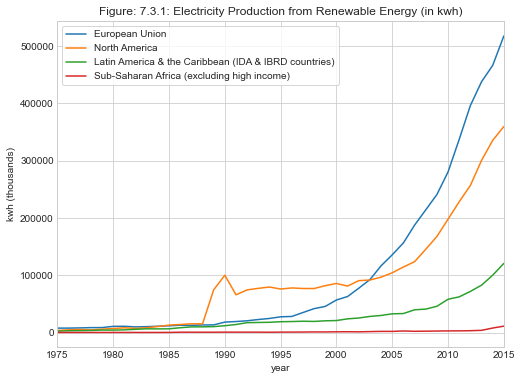

In [23]:
#we plot the figures from above, but this time not interactively
regions = ['European Union',
           'North America',
           'Latin America & the Caribbean (IDA & IBRD countries)',
           'Sub-Saharan Africa (excluding high income)']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='e_in_kwh_thousand',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('kwh (thousands)')
ax.set_xlim(1975, 2015) #removes the space between the border and 2015/1975
ax.set_title('Figure: 7.3.1:'' ''Electricity Production from Renewable Energy (in kwh)')

### Difference in Electricity Production from Renewable Energy from the Mean Electricity Production

Text(0.5, 1.0, 'Figure 7.3.2: Difference in Production from the Mean Value')

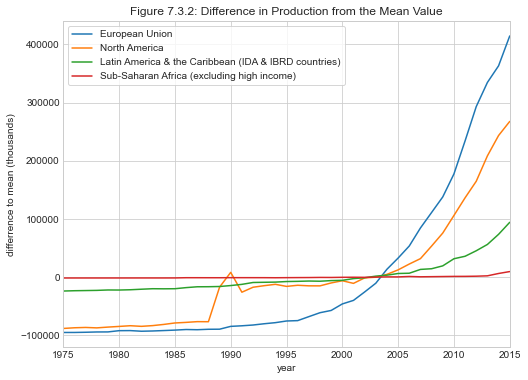

In [24]:
regions = ['European Union',
           'North America',
           'Latin America & the Caribbean (IDA & IBRD countries)',
           'Sub-Saharan Africa (excluding high income)']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='demean',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('differrence to mean (thousands)')
ax.set_xlim(1975, 2015)
ax.set_title('Figure 7.3.2:' ' ' 'Difference in Production from the Mean Value')

ADD text for the two figures here

From the figures above, we observe that across regions, the share of total energy production from renewable sources has steadily increased since the 1970s, with the exception of Latin America and the Carribbean. Indeed, the latter shows an increasing trend in energy production from fossil fuels. This is in line with observations in covered in the news (https://dialogochino.net/en/climate-energy/43661-latin-america-continues-expansion-of-fossil-fuels-despite-climate-change/). The trend of increasing use of renewable sources is represented by the converging difference. Notably, the EU has the highest % share of energy production from renewables and the SSA the lowest. In sum, the challenge of equal access to clean and affordable energy stipulated by SDG 7 remains highly challenged. "